# Encoding datasets with many categorical variables

In [51]:
from utilities.std_imports import *
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import category_encoders as ce

### Load data

In [3]:
ds = pd.read_csv('D:/data/csv/mushrooms.csv')
print(ds.shape)
ds.head()

(8124, 23)


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Ordinal Encoding

In [5]:
ore = OrdinalEncoder()
ore.fit(ds)
ds_ore = ore.transform(ds)
ds_ore = pd.DataFrame(ds_ore)
ds_ore.columns = ds.columns
ds_ore

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


Label encoding (another ordinal)

In [18]:
cols_emb = []
for i in range(ds.shape[1]):
    emb = LabelEncoder()
    emb.fit(ds.iloc[:, i])
    col_emb = emb.transform(ds.iloc[:, i])
    cols_emb.append(col_emb)
ds_emb = pd.DataFrame(cols_emb).T
ds_emb.columns = ds.columns
ds_emb

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Custom binary encoding

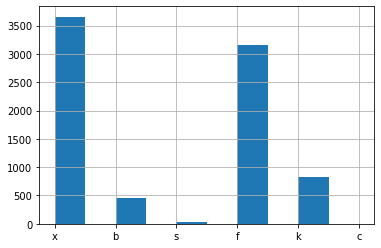

In [26]:
ds['cap_shape'].hist();

In [30]:
cs_be = np.where(ds['cap_shape'].str.contains('x'), 1, 0)
pd.DataFrame({'cs': ds['cap_shape'], 'cs_be': cs_be})

,cs,cs_be
0,x,1
1,x,1
2,b,0
3,x,1
4,x,1
...,...,...
8119,k,0
8120,x,1
8121,f,0
8122,k,0


### Target encoding

In [52]:
ta = ce.TargetEncoder(cols=['cap_shape'])
ds_ta = ta.fit_transform(ds_ore, ds_ore['type'])
ds_ta

C:\Program Files\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1.0,0.467177,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,0.467177,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.106195,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,0.467177,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,0.467177,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.724638,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,0.467177,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,0.493655,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,0.724638,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


### Embeddings

In [54]:
cs_emb = ce.BackwardDifferenceEncoder(cols=['cap_shape'])
cs_embtr = cs_emb.fit_transform(ds['cap_shape'])
cs_embtr

C:\Program Files\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,cap_shape_0,cap_shape_1,cap_shape_2,cap_shape_3,cap_shape_4
0,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
3,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
...,...,...,...,...,...,...
8119,1,0.166667,0.333333,0.5,0.666667,-0.166667
8120,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
8121,1,0.166667,0.333333,0.5,-0.333333,-0.166667
8122,1,0.166667,0.333333,0.5,0.666667,-0.166667


### Credits & Links

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://machinelearningmastery.com/feature-selection-with-categorical-data/  
https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://pbpython.com/categorical-encoding.html
https://github.com/scikit-learn-contrib/category_encoders
https://contrib.scikit-learn.org/category_encoders/targetencoder.html